# Getting to know the dataset

The goal of this notebook is to get a first impression about the dataset. You are free in the methods you want to use. The only important thing is that you record all interesting observations here and/or present them as graphs.

 #### [1. Image size distribution](#title_1)

<hr style="height:2px;border-width:0;color:black;background-color:black">

In [1]:
# imports
import numpy as np
import pandas as pd

import json
from PIL import Image
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
# folder path
input_path = r"C:/Users/linya/Downloads/Data/"

<a id="title_1"></a>
### 1. Image size distribution
<br />

Even without labels, we can already use initial information about the given dataset. One of this information is the size of the image. Is it possible to recognize a pattern? Scratches, for example, are often elongated and thus have a lower area than larger objects like tires. Furthermore, we can see how often certain shapes or sizes appear.

In [3]:
# open JSON file
with open(input_path + r"Annotations/annotated_functional_test3_fixed.json") as f:
    data = json.load(f)

print(f'This dictionary contains these {data.keys()}')

categories = data['categories']
images = data['images']
annotations = data['annotations']

This dictionary contains these dict_keys(['categories', 'images', 'annotations'])


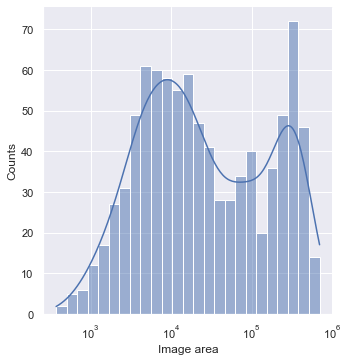

In [4]:
# get area size for all individual crops
area_size = [anotation["area"] for anotation in annotations]

# plot distribution
ax = sns.displot(area_size, bins=25, kde=True, log_scale=True)
ax.set(xlabel='Image area', ylabel='Counts')

#### Observation
We can see that we have a very strongly varying image size. Is it possible that we introduce some bias into our neural network? With many input sizes the class like tire or dent is directly linked.

### Super duper classifier

In [5]:
import random

def super_duper_classifier(image: np.array)-> str:
    
    if np.prod(image.shape) / 3 < 1000:
        return random.choice(["other", "dent"])
    
    elif np.prod(image.shape) / 3 < 3e4:
        return "scratch"
    
    else:
        return "rim"

In [6]:
# fetch random image
random_image = random.choice(os.listdir("images")) 
image = Image.open(os.path.join("images", random_image))

sns.set_theme(style="white", palette=None)
plt.imshow(image)

# get prediction
prediction = super_duper_classifier(np.array(image))
print(f'This is a {prediction}')

NameError: name 'os' is not defined